# Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLLAB/Datasets/adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.isin(['?']).sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['native-country'] = df['native-country'].replace('?',np.nan)

In [ ]:
df.isin(['?']).sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
df.dropna(how = 'any',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
relationship,0
race,0
gender,0
capital-gain,0
capital-loss,0


In [ ]:
df =df.drop_duplicates()

In [ ]:
df.shape

(48640, 12)

In [ ]:
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'marital-status',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [ ]:
df = df.drop(['fnlwgt','educational-num','marital-status','relationship','race'],axis=1)

In [ ]:
df.columns

Index(['age', 'education', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [ ]:
X=df.loc[:,['age', 'education', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week']]

In [ ]:
y=df.loc[:,'income']

In [ ]:
X.head()

,age,education,gender,capital-gain,capital-loss,hours-per-week
0,25,11th,Male,0,0,40
1,38,HS-grad,Male,0,0,50
2,28,Assoc-acdm,Male,0,0,40
3,44,Some-college,Male,7688,0,40
4,18,Some-college,Female,0,0,30


In [ ]:
y.head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)

In [ ]:
numeric_features = X.select_dtypes('number')
categorical_features=X.select_dtypes('object')

In [ ]:
converted_categorical_features = pd.get_dummies(categorical_features)

In [36]:
all_features = [converted_categorical_features,numeric_features]

In [37]:
newX = pd.concat(all_features,axis=1,join='inner')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newX,y,test_size=0.33,random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
y_pred=clf.predict(X_test)

In [41]:
predictions_df=pd.DataFrame()
predictions_df['Predicted_salary_class'] = y_pred
predictions_df['actual_salary_class'] = y_test
predictions_df

,Predicted_salary_class,actual_salary_class
0,0,0.0
1,0,0.0
2,1,NaN
3,0,NaN
4,0,0.0
...,...,...
16047,0,NaN
16048,0,0.0
16049,0,0.0
16050,0,1.0


In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8203962123099925


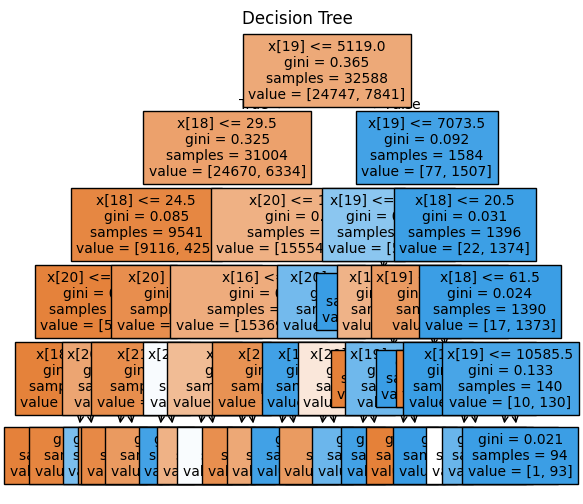

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,6))
plot_tree(clf,fontsize=10,filled=True)
plt.title("Decision Tree")
plt.show()